In [162]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [163]:
%load_ext autoreload
%autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [164]:
sys.path.append('../../datasets/')
sys.path.append('../../')
from siam_pose_dataset import DataSets
from utils.config_helper import load_config

In [165]:
class Config():
    def __init__(self):
        self.config = '/home/chester/SiamPose/experiments/siampose/config.json'

In [166]:
# cfg = {'config': '/home/chester/SiamMask/experiments/siammask_base/config.json'}
cfg = Config()
cfg = load_config(cfg)

In [167]:
train_set = DataSets(cfg['train_datasets'], cfg['anchors'], 1)

In [181]:
template, search, cls, delta, delta_weight, bbox, joints_3d, joints_3d_vis, kp = train_set[20]

[130, 85] [143, 98]
[-6, -6] [7, 7]
[129, 83] [142, 96]
[-6, -6] [7, 7]
[124, 82] [137, 95]
[112, 89] [125, 102]
[124, 92] [137, 105]
[106, 102] [119, 115]
[128, 108] [141, 121]
[115, 111] [128, 124]
[132, 119] [145, 132]
[112, 119] [125, 132]
[120, 121] [133, 134]
[117, 141] [130, 154]
[125, 140] [138, 153]
[120, 159] [133, 172]
[128, 158] [141, 171]


In [182]:
cls.shape

(5, 25, 25)

In [183]:
bbox

array([108.821434,  80.07185 , 145.17857 , 173.92815 ], dtype=float32)

In [184]:
search.shape

(3, 255, 255)

In [185]:
template.shape

(3, 127, 127)

In [186]:
joints_3d.shape

(17, 255, 255)

In [187]:
np.transpose(joints_3d, (1,2,0)).shape

(255, 255, 17)

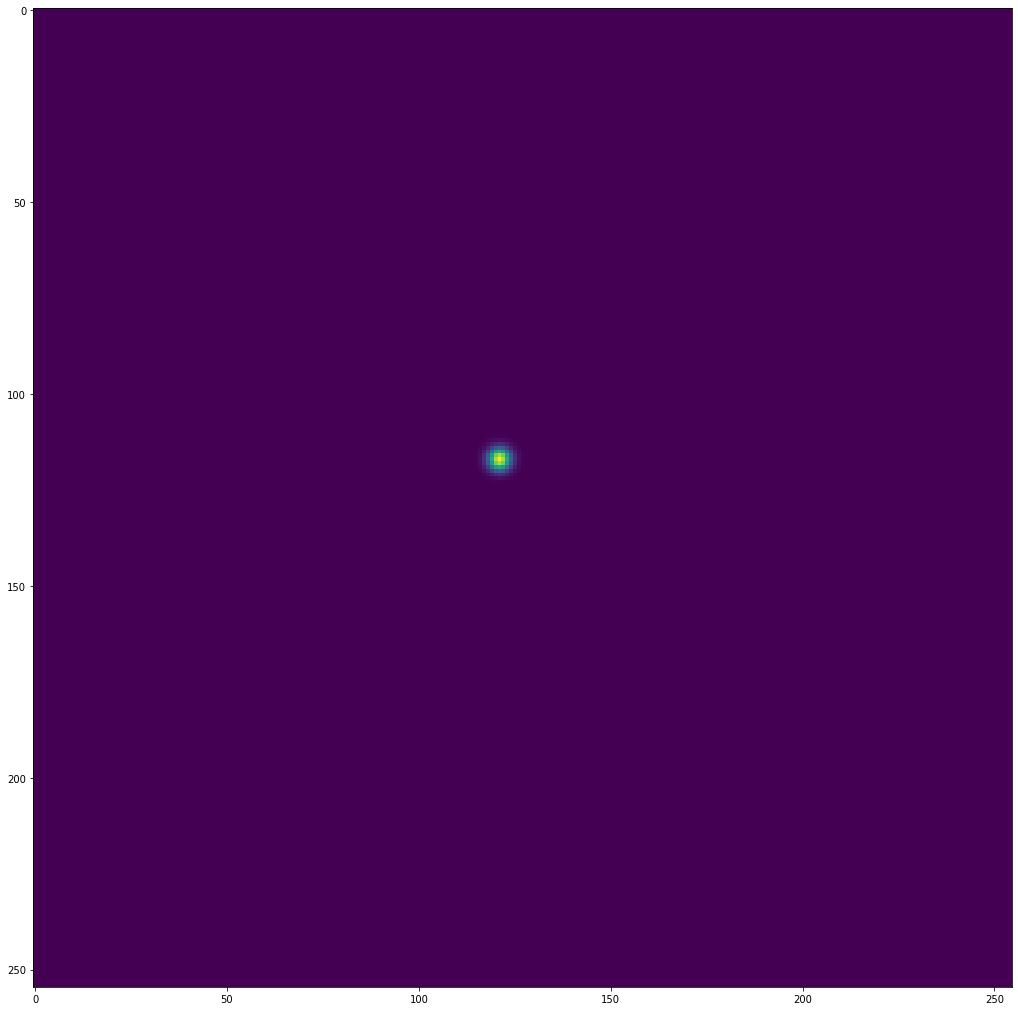

In [188]:
plt.figure(figsize=(20, 18))
plt.imshow(np.transpose(joints_3d, (1,2,0))[:, :, 9])

In [189]:
kp

[135.52007971501774,
 91.02979691577808,
 2.0,
 0,
 0,
 0,
 134.90041906097633,
 89.17087478378365,
 2.0,
 0,
 0,
 0,
 129.63348299201374,
 87.93159834829818,
 2.0,
 117.86028954600577,
 95.05747150678762,
 2.0,
 129.63348299201374,
 97.84585470477926,
 2.0,
 112.28350819249006,
 108.06994138828107,
 2.0,
 134.2807883219998,
 114.26636843830575,
 2.0,
 120.64867274399741,
 116.74493626680912,
 2.0,
 138.30846291300935,
 125.11008586078403,
 2.0,
 118.17010491549404,
 125.41991618780473,
 2.0,
 126.22545409751312,
 126.9690229503109,
 2.0,
 122.81742520301255,
 147.41718135978203,
 2.0,
 131.49240512400814,
 146.17791988182904,
 2.0,
 125.60580840100418,
 164.7671711168382,
 2.0,
 133.66115758302328,
 164.45734078981747,
 2.0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


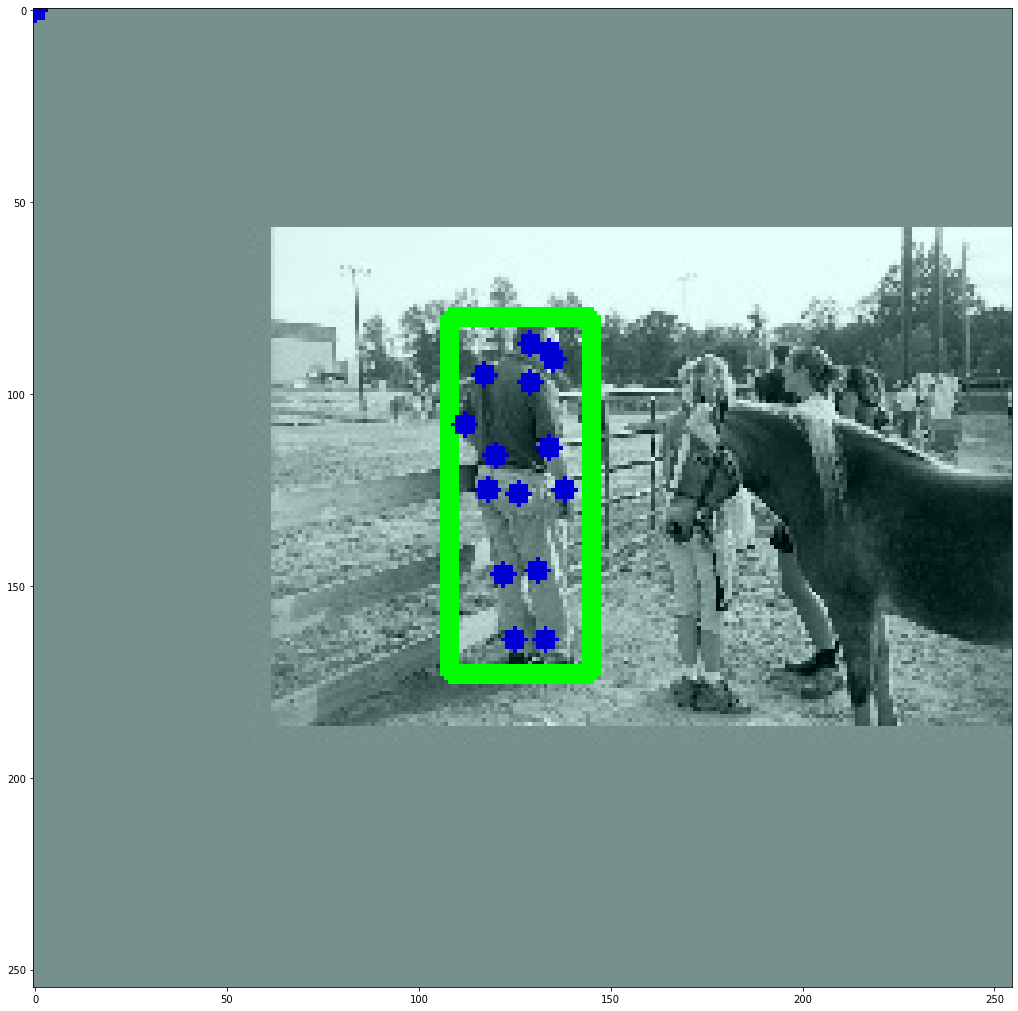

In [190]:
# cv2.circle(img,(60,60),3,(0,0,213),-1)
img = np.transpose(search, (1,2,0)).astype(np.int16)
cv2.rectangle(img, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (0,255,0), 3)
for i in range(17):
    x = int(kp[i * 3 + 0])
    y = int(kp[i * 3 + 1])
    cv2.circle(img,(x, y), 3,(0,0,213),-1)
plt.figure(figsize=(20, 18))
plt.imshow(img)

In [191]:
# cv2.circle(img,(60,60),3,(0,0,213),-1)
img = np.transpose(search, (1,2,0)).astype(np.int16)
for i in range(17):
    x = int(search_kp[i * 3 + 0])
    y = int(search_kp[i * 3 + 1])
    cv2.circle(img,(x, y), 3,(0,0,213),-1)
plt.figure(figsize=(20, 18))
plt.imshow(img)

NameError: name 'search_kp' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


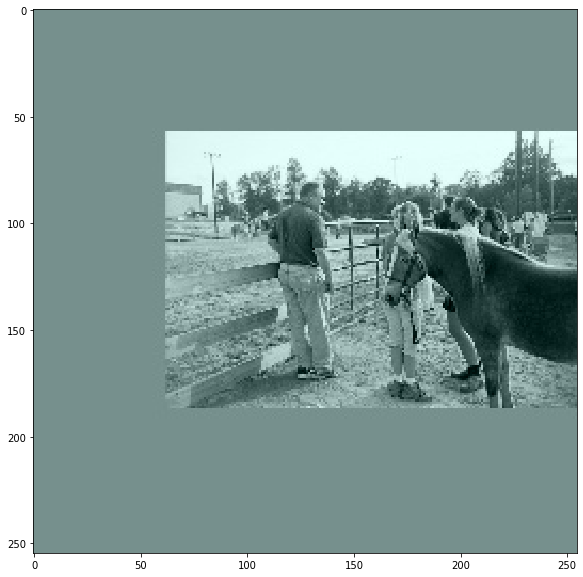

In [192]:
plt.figure(figsize=(15, 10))
plt.imshow(np.transpose(search, (1,2,0)).astype(np.int16))

In [ ]:
bbox

In [ ]:
search

In [ ]:
template

In [ ]:
template.shape

In [ ]:
search.shape

In [ ]:
train_set.all_data[0].labels